**IMPORTAÇÃO DAS BIBLIOTECAS**

In [ ]:
import pandas as pd
import pandera as pa

**EXTRAÇÃO DOS DADOS DE UMA/VÁRIAS FONTE(S)**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dados/ocorrencia_2010_2020 - ocorrencia_2010_2020.csv", sep=";", parse_dates = ["ocorrencia_dia"], dayfirst = True) #parse_dates transforma uma coluna em tipo data
df

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,****,2020-12-31,09:00:00,0


In [ ]:
df.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia2                   int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
dtype: object

In [ ]:
#Verificando quais dados estão contidos de maneira única
pd.unique(df['ocorrencia_classificacao'])

array(['INCIDENTE', 'ACIDENTE', 'INCIDENTE GRAVE'], dtype=object)

In [ ]:
pd.unique(df['ocorrencia_uf'])

array(['RJ', 'PA', 'MT', 'RS', 'BA', 'AM', 'PR', 'MG', 'SP', 'DF', 'AC',
       'TO', 'SC', 'GO', 'MA', 'ES', 'PE', 'RR', 'MS', 'CE', 'AP', 'AL',
       'RO', 'SE', 'PB', 'PI', 'RN', '**'], dtype=object)

In [ ]:
sorted(pd.unique(df['ocorrencia_aerodromo']))

['###!',
 '####',
 '****',
 '*****',
 '5JTI',
 '9PAA',
 '9PFC',
 '9PFX',
 '9PHD',
 '9PSD',
 'SBAE',
 'SBAN',
 'SBAQ',
 'SBAR',
 'SBAT',
 'SBAU',
 'SBBE',
 'SBBH',
 'SBBI',
 'SBBP',
 'SBBQ',
 'SBBR',
 'SBBU',
 'SBBV',
 'SBBW',
 'SBBZ',
 'SBCA',
 'SBCB',
 'SBCF',
 'SBCG',
 'SBCJ',
 'SBCP',
 'SBCR',
 'SBCT',
 'SBCX',
 'SBCY',
 'SBCZ',
 'SBDN',
 'SBEG',
 'SBEK',
 'SBFE',
 'SBFI',
 'SBFL',
 'SBFN',
 'SBFS',
 'SBFZ',
 'SBGL',
 'SBGO',
 'SBGP',
 'SBGR',
 'SBGV',
 'SBGW',
 'SBHT',
 'SBIH',
 'SBIL',
 'SBIP',
 'SBIT',
 'SBIZ',
 'SBJA',
 'SBJC',
 'SBJD',
 'SBJF',
 'SBJI',
 'SBJP',
 'SBJR',
 'SBJU',
 'SBJV',
 'SBKG',
 'SBKP',
 'SBLE',
 'SBLJ',
 'SBLO',
 'SBMA',
 'SBMD',
 'SBME',
 'SBMG',
 'SBMK',
 'SBML',
 'SBMO',
 'SBMQ',
 'SBMS',
 'SBMT',
 'SBMY',
 'SBNF',
 'SBNM',
 'SBNT',
 'SBPA',
 'SBPB',
 'SBPC',
 'SBPF',
 'SBPJ',
 'SBPK',
 'SBPL',
 'SBPN',
 'SBPP',
 'SBPR',
 'SBPS',
 'SBPV',
 'SBQV',
 'SBRB',
 'SBRD',
 'SBRF',
 'SBRJ',
 'SBRP',
 'SBSG',
 'SBSJ',
 'SBSL',
 'SBSM',
 'SBSN',
 'SBSP',
 'SBSR',


In [ ]:
df.loc[df.ocorrencia_uf == '**']

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2227,49474,49474,ACIDENTE,ÁGUAS INTERNACIONAIS,**,****,2013-09-02,02:54:00,0


In [ ]:
#Backup do dataframe
dfback = df
dfback.head()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0


Inconsistências:

ocorrencia_uf -> `'**'`

ocorrencia_aerodromo -> `'****' , '###!' , '*****' , '####'`

A considerar: aerodromos '5JTI',
 '9PAA',
 '9PFC',
 '9PFX',
 '9PHD',
 '9PSD',

In [ ]:
#Verificando se os códigos dos aeródromos são inconsistências
df.loc[df.ocorrencia_aerodromo == '9PAA']

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3708,65543,65543,INCIDENTE,MACAÉ,RJ,9PAA,2016-08-05,18:00:00,0
5470,79380,79380,INCIDENTE,RIO DE JANEIRO,RJ,9PAA,2020-06-09,14:35:00,0
5710,79714,79714,INCIDENTE,RIO DE JANEIRO,RJ,9PAA,2020-12-08,14:50:00,0


**LIMPEZA/TRATAMENTO DOS DADOS**

In [ ]:
df.replace(['**', '****', '*****', '####', '###!'], pd.NA, inplace = True)

In [ ]:
df.head()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0


In [ ]:
#Verificando no dataframe se consta algum <NA>
df.isna().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  1
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [ ]:
#Deleta todas as linhas que contém <NA>
df.dropna()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
6,40215,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2
...,...,...,...,...,...,...,...,...,...
5743,79824,79824,ACIDENTE,RIO PARANAÍBA,MG,SNRP,2020-12-28,17:00:00,0
5746,79769,79769,INCIDENTE GRAVE,MANOEL URBANO,AC,SIMB,2020-12-29,18:30:00,0
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0


In [ ]:
#Deleta os <NA> somente da coluna informada
df.dropna(subset=['ocorrencia_uf'])

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,<NA>,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,<NA>,2020-12-31,09:00:00,0


In [ ]:
#Deleta os dados duplicados (ou seja mantém 1 e deleta os outros)
df.drop_duplicates()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,<NA>,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,<NA>,2020-12-31,09:00:00,0


***Validação de dados***

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        "codigo_ocorrencia":pa.Column(pa.Int),
        "codigo_ocorrencia2":pa.Column(pa.Int),
        "ocorrencia_classificacao":pa.Column(pa.String),
        "ocorrencia_cidade":pa.Column(pa.String),
        "ocorrencia_uf":pa.Column(pa.String, pa.Check.str_length(2,2), nullable = True),
        "ocorrencia_aerodromo":pa.Column(pa.String, pa.Check.str_length(4,4), nullable = True),
        "ocorrencia_dia":pa.Column(pa.DateTime),
        "ocorrencia_hora":pa.Column(pa.String, pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9]):([0-5][0-9])?$'),nullable=True),
        'total_recomendacoes':pa.Column(pa.Int)
    }
)

In [ ]:
schema.validate(df)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,<NA>,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,<NA>,2020-12-31,09:00:00,0


**FILTROS**

In [ ]:
#Verificando no dataframe se consta algum <NA>
df.isna().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  1
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [ ]:
df.count()

codigo_ocorrencia           5752
codigo_ocorrencia2          5752
ocorrencia_classificacao    5752
ocorrencia_cidade           5752
ocorrencia_uf               5751
ocorrencia_aerodromo        3403
ocorrencia_dia              5752
ocorrencia_hora             5751
total_recomendacoes         5752
dtype: int64

In [ ]:
filter = df.ocorrencia_uf.isnull()

In [ ]:
df.loc[filter]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2227,49474,49474,ACIDENTE,ÁGUAS INTERNACIONAIS,<NA>,<NA>,2013-09-02,02:54:00,0


In [ ]:
filter1 = df.ocorrencia_classificacao == 'ACIDENTE'
df.loc[filter1]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
11,40069,40069,ACIDENTE,SÃO PAULO,SP,SBMT,2010-01-10,14:50:00,8
13,39507,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,<NA>,2010-01-11,17:00:00,2
14,40107,40107,ACIDENTE,GURUPÁ,PA,SNGU,2010-01-12,14:30:00,0
15,39315,39315,ACIDENTE,CANUTAMA,AM,<NA>,2010-01-15,21:22:00,0
...,...,...,...,...,...,...,...,...,...
5737,79748,79748,ACIDENTE,SANTANA DO LIVRAMENTO,RS,<NA>,2020-12-23,13:30:00,0
5739,79749,79749,ACIDENTE,MARITUBA,PA,<NA>,2020-12-26,12:05:00,0
5740,79751,79751,ACIDENTE,PRESIDENTE CASTELO BRANCO,PR,SSXO,2020-12-27,12:30:00,0
5743,79824,79824,ACIDENTE,RIO PARANAÍBA,MG,SNRP,2020-12-28,17:00:00,0


In [ ]:
df.loc[filter1, ['ocorrencia_cidade', 'ocorrencia_hora', 'total_recomendacoes']]

,ocorrencia_cidade,ocorrencia_hora,total_recomendacoes
3,LUCAS DO RIO VERDE,17:30:00,0
11,SÃO PAULO,14:50:00,8
13,PRIMAVERA DO LESTE,17:00:00,2
14,GURUPÁ,14:30:00,0
15,CANUTAMA,21:22:00,0
...,...,...,...
5737,SANTANA DO LIVRAMENTO,13:30:00,0
5739,MARITUBA,12:05:00,0
5740,PRESIDENTE CASTELO BRANCO,12:30:00,0
5743,RIO PARANAÍBA,17:00:00,0


In [ ]:
filter2 = df.ocorrencia_classificacao == 'ACIDENTE'
filter3 = df.ocorrencia_uf == 'RJ'

In [ ]:
df.loc[filter2 & filter3]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
31,39323,39323,ACIDENTE,CASIMIRO DE ABREU,RJ,<NA>,2010-01-24,16:15:00,0
49,39295,39295,ACIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-02-06,21:09:00,0
149,40447,40447,ACIDENTE,MANGARATIBA,RJ,<NA>,2010-04-21,18:55:00,0
155,40554,40554,ACIDENTE,RESENDE,RJ,<NA>,2010-04-27,18:47:00,8
248,41729,41729,ACIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-06-25,13:05:00,0
...,...,...,...,...,...,...,...,...,...
4966,78744,78744,ACIDENTE,ITABORAÍ,RJ,<NA>,2019-06-22,12:45:00,0
5411,79309,79309,ACIDENTE,RIO DE JANEIRO,RJ,<NA>,2020-04-17,14:30:00,0
5503,79430,79430,ACIDENTE,RIO DE JANEIRO,RJ,<NA>,2020-07-06,17:40:00,0
5636,79621,79621,ACIDENTE,RIO CLARO,RJ,<NA>,2020-10-15,11:00:00,0


In [ ]:
df.loc[filter2 | filter3]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
11,40069,40069,ACIDENTE,SÃO PAULO,SP,SBMT,2010-01-10,14:50:00,8
13,39507,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,<NA>,2010-01-11,17:00:00,2
...,...,...,...,...,...,...,...,...,...
5740,79751,79751,ACIDENTE,PRESIDENTE CASTELO BRANCO,PR,SSXO,2020-12-27,12:30:00,0
5743,79824,79824,ACIDENTE,RIO PARANAÍBA,MG,SNRP,2020-12-28,17:00:00,0
5745,79755,79755,ACIDENTE,MATO RICO,PR,<NA>,2020-12-29,10:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0


In [ ]:
filter4 = df.ocorrencia_classificacao.isin(['ACIDENTE', 'INCIDENTE'])
filter5 = df.ocorrencia_uf == 'SP'

In [ ]:
df.loc[filter4 & filter5]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
11,40069,40069,ACIDENTE,SÃO PAULO,SP,SBMT,2010-01-10,14:50:00,8
16,39809,39809,INCIDENTE,SÃO PAULO,SP,<NA>,2010-01-15,15:00:00,0
18,39828,39828,INCIDENTE,SANTOS,SP,<NA>,2010-01-15,17:45:00,0
26,39847,39847,INCIDENTE,SOROCABA,SP,<NA>,2010-01-20,13:10:00,0
27,39768,39768,INCIDENTE,CAMPINAS,SP,<NA>,2010-01-21,20:45:00,0
...,...,...,...,...,...,...,...,...,...
5683,79730,79730,INCIDENTE,SÃO PAULO,SP,<NA>,2020-11-17,16:00:00,0
5696,79692,79692,ACIDENTE,CATANDUVA,SP,SDCD,2020-11-28,12:50:00,0
5700,79699,79699,INCIDENTE,GUARULHOS,SP,SBGR,2020-11-30,17:00:00,0
5742,79800,79800,INCIDENTE,SÃO PAULO,SP,SBMT,2020-12-28,10:15:00,0


In [ ]:
filtroLetra = df.ocorrencia_cidade.str[-1] == 'E'
df.loc[filtroLetra]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
13,39507,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,<NA>,2010-01-11,17:00:00,2
45,39316,39316,ACIDENTE,RIO DO OESTE,SC,<NA>,2010-02-04,17:55:00,2
46,39155,39155,INCIDENTE,BELO HORIZONTE,MG,<NA>,2010-02-05,12:55:00,0
69,39727,39727,INCIDENTE GRAVE,VÁRZEA GRANDE,MT,SBCY,2010-02-23,19:42:00,0
...,...,...,...,...,...,...,...,...,...
5720,79726,79726,INCIDENTE GRAVE,BELO HORIZONTE,MG,SBPR,2020-12-13,13:41:00,0
5723,79737,79737,INCIDENTE,BELO HORIZONTE,MG,SBBH,2020-12-17,17:13:00,0
5725,79741,79741,INCIDENTE,BELO HORIZONTE,MG,SBBH,2020-12-18,22:57:00,0
5728,79744,79744,INCIDENTE,BELO HORIZONTE,MG,SBCF,2020-12-18,02:34:00,0


In [ ]:
#Filtrando para saber se a palavra está contida no dataframe
filtroLetra = df.ocorrencia_cidade.str.contains('VERDE')
df.loc[filtroLetra]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
70,39317,39317,ACIDENTE,RIO VERDE,GO,SWLC,2010-02-24,13:00:00,0
146,40264,40264,ACIDENTE,CAMPO VERDE,MT,SWOZ,2010-04-20,16:30:00,2
179,40843,40843,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-05-08,18:30:00,0
580,43703,43703,ACIDENTE,CAMPO VERDE,MT,<NA>,2011-01-15,19:00:00,0
678,44062,44062,INCIDENTE,RIO VERDE,GO,<NA>,2011-03-09,14:30:00,0
730,44347,44347,INCIDENTE,RIO VERDE,GO,<NA>,2011-04-11,18:20:00,0
785,44530,44530,ACIDENTE,RIO VERDE,GO,<NA>,2011-05-12,19:45:00,0
808,44592,44592,ACIDENTE,OURO VERDE,SP,<NA>,2011-05-28,19:40:00,0
1111,45294,45294,INCIDENTE,RIO VERDE,GO,<NA>,2011-12-21,11:28:00,0


In [ ]:
filtroContem = df.ocorrencia_cidade.str.contains('MA|RIO')
df.loc[filtroContem]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,<NA>,2010-01-09,12:30:00,3
13,39507,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,<NA>,2010-01-11,17:00:00,2
...,...,...,...,...,...,...,...,...,...
5743,79824,79824,ACIDENTE,RIO PARANAÍBA,MG,SNRP,2020-12-28,17:00:00,0
5745,79755,79755,ACIDENTE,MATO RICO,PR,<NA>,2020-12-29,10:30:00,0
5746,79769,79769,INCIDENTE GRAVE,MANOEL URBANO,AC,SIMB,2020-12-29,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0


In [ ]:
#Filtrando pelo Ano
filtroData = df.ocorrencia_dia.dt.year == 2018
df.loc[filtroData & filter5 & filter2]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
4320,77636,77636,ACIDENTE,JUNDIAÍ,SP,SBJD,2018-01-14,10:07:00,0
4345,77687,77687,ACIDENTE,PROMISSÃO,SP,<NA>,2018-02-07,12:10:00,0
4351,77685,77685,ACIDENTE,ITAPETININGA,SP,<NA>,2018-02-12,21:30:00,1
4366,77717,77717,ACIDENTE,QUADRA,SP,<NA>,2018-02-25,14:30:00,1
4387,77743,77743,ACIDENTE,JABOTICABAL,SP,<NA>,2018-03-13,13:00:00,0
4392,77753,77753,ACIDENTE,AVANHANDAVA,SP,<NA>,2018-03-16,13:00:00,0
4403,77770,77770,ACIDENTE,ARAÇATUBA,SP,<NA>,2018-03-22,18:15:00,1
4411,77773,77773,ACIDENTE,BRAGANÇA PAULISTA,SP,<NA>,2018-03-25,21:00:00,0
4459,79567,79567,ACIDENTE,UBATUBA,SP,SDUB,2018-05-01,20:45:00,0
4463,77866,77866,ACIDENTE,VINHEDO,SP,<NA>,2018-05-05,20:30:00,0


In [ ]:
filter_ano = df.ocorrencia_dia.dt.year == 2016
filter_mes = df.ocorrencia_dia.dt.month == 11
filter_dia_inicial = df.ocorrencia_dia.dt.day > 2
filter_dia_final = df.ocorrencia_dia.dt.day < 22

df.loc[filter_ano & filter_mes & filter_dia_inicial & filter_dia_final]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3805,65963,65963,INCIDENTE,SALVADOR,BA,SBSV,2016-11-03,23:53:00,0
3806,65936,65936,INCIDENTE,SÃO JOSÉ DOS CAMPOS,SP,SBSJ,2016-11-04,21:55:00,0
3807,65994,65994,INCIDENTE,SÃO PAULO,SP,SBMT,2016-11-06,16:06:00,0
3808,65953,65953,INCIDENTE,JUNDIAÍ,SP,SBJD,2016-11-07,11:30:00,0
3809,65978,65978,INCIDENTE,UBERLÂNDIA,MG,SBUL,2016-11-07,19:48:00,0
3810,65980,65980,ACIDENTE,ALTO PARAÍSO DE GOIÁS,GO,<NA>,2016-11-08,16:00:00,0
3811,65981,65981,INCIDENTE GRAVE,RIO NEGRINHO,SC,<NA>,2016-11-08,16:15:00,2
3812,65974,65974,INCIDENTE,UBATUBA,SP,SDUB,2016-11-09,14:35:00,0
3813,65990,65990,INCIDENTE,CAMPINAS,SP,SBKP,2016-11-10,20:40:00,0
3814,65982,65982,ACIDENTE,SANTO AMARO DA IMPERATRIZ,SC,<NA>,2016-11-11,13:00:00,1


In [ ]:
df['data_hora'] = pd.to_datetime(df.ocorrencia_dia.astype(str) + ' ' + df.ocorrencia_hora)

In [ ]:
df.head()

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,data_hora
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0,2010-01-03 12:00:00
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0,2010-01-03 11:05:00
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,2010-01-03 03:00:00
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0,2010-01-04 17:30:00
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0,2010-01-05 19:25:00


In [ ]:
periodo_inicial = df.data_hora >= '2018-10-01 00:00:00'
periodo_final = df.data_hora <= '2018-10-15 23:00:00'

In [ ]:
df.loc[periodo_inicial & periodo_final]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,data_hora
4643,78214,78214,INCIDENTE,BELO HORIZONTE,MG,SBBH,2018-10-01,14:04:00,0,2018-10-01 14:04:00
4644,78228,78228,INCIDENTE,VÁRZEA GRANDE,MT,SBCY,2018-10-01,14:20:00,0,2018-10-01 14:20:00
4645,78298,78298,INCIDENTE,BRASÍLIA,DF,<NA>,2018-10-04,10:40:00,0,2018-10-04 10:40:00
4646,78233,78233,INCIDENTE,GOIÂNIA,GO,SBGO,2018-10-05,09:24:00,0,2018-10-05 09:24:00
4647,78235,78235,INCIDENTE GRAVE,PASSO FUNDO,RS,SBPF,2018-10-08,20:50:00,2,2018-10-08 20:50:00
4648,78237,78237,INCIDENTE,BELO HORIZONTE,MG,SBBH,2018-10-09,09:30:00,0,2018-10-09 09:30:00
4649,78247,78247,INCIDENTE,UBERABA,MG,SBUR,2018-10-09,02:00:00,0,2018-10-09 02:00:00
4650,78238,78238,ACIDENTE,BELMONTE,BA,<NA>,2018-10-11,13:06:00,0,2018-10-11 13:06:00
4651,78240,78240,ACIDENTE,GUARUJÁ,SP,<NA>,2018-10-11,21:00:00,0,2018-10-11 21:00:00
4652,78241,78241,INCIDENTE GRAVE,EXTREMOZ,RN,<NA>,2018-10-12,14:15:00,0,2018-10-12 14:15:00


In [ ]:
#Filtrando somente pelas horas
df.data_hora.dt.time.between_time()

**Filtros para Load / Carregamento**

In [ ]:
filtro_ano = df.ocorrencia_dia.dt.year == 2012
filtro_mes = df.ocorrencia_dia.dt.month == 3
df2012marco = df.loc[filtro_ano & filtro_mes]

In [ ]:
df2012marco

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,data_hora
1223,45727,45727,INCIDENTE,BARRA DO GARÇAS,MT,SBBW,2012-03-01,12:50:00,0,2012-03-01 12:50:00
1224,45526,45526,ACIDENTE,QUERÊNCIA DO NORTE,PR,<NA>,2012-03-02,12:50:00,0,2012-03-02 12:50:00
1225,45589,45589,ACIDENTE,LINS,SP,SWXQ,2012-03-02,17:35:00,0,2012-03-02 17:35:00
1226,45707,45707,INCIDENTE,FORTALEZA,CE,SBFZ,2012-03-02,22:12:00,0,2012-03-02 22:12:00
1227,45610,45610,INCIDENTE,SÃO JOSÉ DO RIO PRETO,SP,<NA>,2012-03-03,13:00:00,0,2012-03-03 13:00:00
...,...,...,...,...,...,...,...,...,...,...
1279,45773,45773,INCIDENTE,SANTA MARIA,RS,<NA>,2012-03-29,20:33:00,0,2012-03-29 20:33:00
1280,45785,45785,INCIDENTE,COARI,AM,<NA>,2012-03-29,15:20:00,3,2012-03-29 15:20:00
1281,45754,45754,INCIDENTE GRAVE,GOIÂNIA,GO,SWNV,2012-03-30,14:30:00,0,2012-03-30 14:30:00
1282,45774,45774,INCIDENTE,BELO HORIZONTE,MG,SBBH,2012-03-30,13:31:00,0,2012-03-30 13:31:00


In [ ]:
df2012marco.count()

codigo_ocorrencia           61
codigo_ocorrencia2          61
ocorrencia_classificacao    61
ocorrencia_cidade           61
ocorrencia_uf               61
ocorrencia_aerodromo        30
ocorrencia_dia              61
ocorrencia_hora             61
total_recomendacoes         61
data_hora                   61
dtype: int64

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).ocorrencia_classificacao.count()

ocorrencia_classificacao
ACIDENTE           14
INCIDENTE          43
INCIDENTE GRAVE     4
Name: ocorrencia_classificacao, dtype: int64

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).ocorrencia_aerodromo.count()

ocorrencia_classificacao
ACIDENTE            6
INCIDENTE          22
INCIDENTE GRAVE     2
Name: ocorrencia_aerodromo, dtype: int64

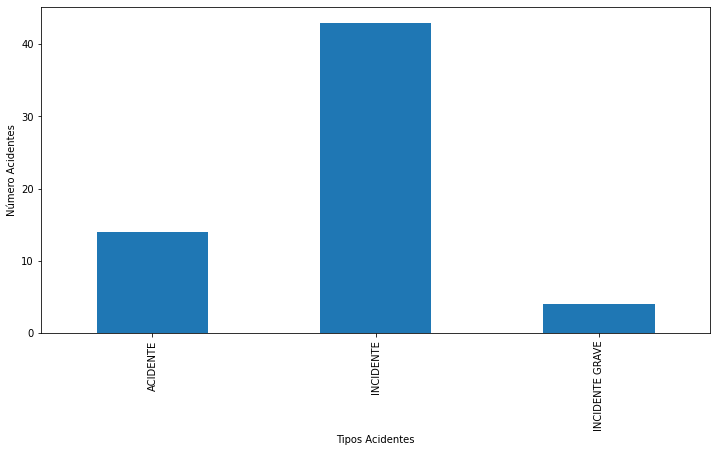

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).size().plot.bar(figsize = (12, 6), xlabel = 'Tipos Acidentes', ylabel = 'Número Acidentes')

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).size().sort_values(ascending = True)

ocorrencia_classificacao
INCIDENTE GRAVE     4
ACIDENTE           14
INCIDENTE          43
dtype: int64

In [ ]:
ano2011 = df.ocorrencia_dia.dt.year == 2011
estados = df.ocorrencia_uf.isin(['SP', 'RJ', 'MG', 'ES'])

dfsudeste2011 = df.loc[ano2011 & estados]

In [ ]:
dfsudeste2011

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,data_hora
552,43633,43633,INCIDENTE GRAVE,RIBEIRÃO PRETO,SP,SBRP,2011-01-01,19:35:00,10,2011-01-01 19:35:00
554,43643,43643,INCIDENTE,RIO DE JANEIRO,RJ,SBJR,2011-01-02,17:18:00,0,2011-01-02 17:18:00
558,43631,43631,INCIDENTE,CONFINS,MG,SBCF,2011-01-05,15:36:00,0,2011-01-05 15:36:00
559,43642,43642,INCIDENTE,BAURU,SP,SBBU,2011-01-05,22:06:00,0,2011-01-05 22:06:00
560,43630,43630,INCIDENTE,COLINA,SP,<NA>,2011-01-06,11:30:00,0,2011-01-06 11:30:00
...,...,...,...,...,...,...,...,...,...,...
1120,45327,45327,INCIDENTE,CONFINS,MG,SBCF,2011-12-29,06:48:00,0,2011-12-29 06:48:00
1122,51880,51880,INCIDENTE,GUARULHOS,SP,<NA>,2011-12-29,09:00:00,0,2011-12-29 09:00:00
1123,51881,51881,INCIDENTE,BELO HORIZONTE,MG,<NA>,2011-12-29,17:18:00,0,2011-12-29 17:18:00
1124,51882,51882,INCIDENTE,GUARULHOS,SP,SBGR,2011-12-29,14:11:00,0,2011-12-29 14:11:00


In [ ]:
dfsudeste2011.groupby(['ocorrencia_classificacao']).size()

ocorrencia_classificacao
ACIDENTE            65
INCIDENTE          176
INCIDENTE GRAVE     21
dtype: int64

In [ ]:
dfsudeste2011.count()

codigo_ocorrencia           262
codigo_ocorrencia2          262
ocorrencia_classificacao    262
ocorrencia_cidade           262
ocorrencia_uf               262
ocorrencia_aerodromo        117
ocorrencia_dia              262
ocorrencia_hora             262
total_recomendacoes         262
data_hora                   262
dtype: int64

In [ ]:
dfsudeste2011.groupby(['ocorrencia_uf', 'ocorrencia_classificacao']).size()

ocorrencia_uf  ocorrencia_classificacao
ES             ACIDENTE                     1
               INCIDENTE                    6
               INCIDENTE GRAVE              2
MG             ACIDENTE                    12
               INCIDENTE                   23
               INCIDENTE GRAVE              7
RJ             ACIDENTE                     9
               INCIDENTE                   63
               INCIDENTE GRAVE              5
SP             ACIDENTE                    43
               INCIDENTE                   84
               INCIDENTE GRAVE              7
dtype: int64

In [ ]:
dfsudeste2011.groupby(['ocorrencia_cidade', 'ocorrencia_uf']).size().sort_values(ascending = False)

ocorrencia_cidade  ocorrencia_uf
RIO DE JANEIRO     RJ               44
GUARULHOS          SP               20
SÃO PAULO          SP               20
BELO HORIZONTE     MG               14
RIBEIRÃO PRETO     SP               14
                                    ..
MARÍLIA            SP                1
VILA VELHA         ES                1
MANHUAÇU           MG                1
JAÍBA              MG                1
AIMORÉS            MG                1
Length: 84, dtype: int64

In [ ]:
dfsudeste2011.groupby(['ocorrencia_aerodromo']).codigo_ocorrencia.sum()

ocorrencia_aerodromo
SBAU    147609
SBBH    187184
SBBP    230095
SBBU     88044
SBCB     51778
SBCF     88958
SBCP     44435
SBGL    274295
SBGR    660402
SBIP     51793
SBJD     44902
SBJR    459859
SBKP     43707
SBME    244840
SBML     43634
SBMT    231242
SBPR    185254
SBRJ    420578
SBRP    221232
SBSJ     51828
SBSP    178849
SBSR    141613
SBUL     89594
SBUR     44442
SBVT    133563
SDAA     43901
SDBB    103597
SDBV     45268
SDCO    103643
SDET     44645
SDIO     44377
SDJA    133153
SDMC     48814
SDOR     90127
SDPW    103659
SDTB     98506
SDTK     43832
SDVE     44734
SIBX     51785
SIRS     51789
SNPD     51781
Name: codigo_ocorrencia, dtype: int64

In [ ]:
dfsudeste2011.groupby(['ocorrencia_aerodromo'], dropna = False).total_recomendacoes.sum()

ocorrencia_aerodromo
SBAU     3
SBBH     0
SBBP     0
SBBU     2
SBCB     0
SBCF     0
SBCP     0
SBGL     0
SBGR     0
SBIP     0
SBJD     0
SBJR     2
SBKP     0
SBME     0
SBML     0
SBMT     0
SBPR     1
SBRJ     0
SBRP    10
SBSJ     0
SBSP     5
SBSR     0
SBUL    20
SBUR     0
SBVT     0
SDAA     0
SDBB     0
SDBV     0
SDCO     0
SDET     0
SDIO    11
SDJA     0
SDMC     0
SDOR     0
SDPW     0
SDTB     2
SDTK     0
SDVE     0
SIBX     0
SIRS     0
SNPD     0
NaN     68
Name: total_recomendacoes, dtype: int64

**CARREGAMENTO PARA CSV**

In [ ]:
dfsudeste2011.to_csv('sudeste2011.csv', index=False)

In [ ]:
df2012marco.to_csv('marco2012.csv', index=False)

In [ ]:
teste = pd.read_csv('/content/sudeste2011.csv')
teste

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,data_hora
0,43633,43633,INCIDENTE GRAVE,RIBEIRÃO PRETO,SP,SBRP,2011-01-01 00:00:00,19:35:00,10,2011-01-01 19:35:00
1,43643,43643,INCIDENTE,RIO DE JANEIRO,RJ,SBJR,2011-01-02 00:00:00,17:18:00,0,2011-01-02 17:18:00
2,43631,43631,INCIDENTE,CONFINS,MG,SBCF,2011-01-05 00:00:00,15:36:00,0,2011-01-05 15:36:00
3,43642,43642,INCIDENTE,BAURU,SP,SBBU,2011-01-05 00:00:00,22:06:00,0,2011-01-05 22:06:00
4,43630,43630,INCIDENTE,COLINA,SP,NaN,2011-01-06 00:00:00,11:30:00,0,2011-01-06 11:30:00
...,...,...,...,...,...,...,...,...,...,...
257,45327,45327,INCIDENTE,CONFINS,MG,SBCF,2011-12-29 00:00:00,06:48:00,0,2011-12-29 06:48:00
258,51880,51880,INCIDENTE,GUARULHOS,SP,NaN,2011-12-29 00:00:00,09:00:00,0,2011-12-29 09:00:00
259,51881,51881,INCIDENTE,BELO HORIZONTE,MG,NaN,2011-12-29 00:00:00,17:18:00,0,2011-12-29 17:18:00
260,51882,51882,INCIDENTE,GUARULHOS,SP,SBGR,2011-12-29 00:00:00,14:11:00,0,2011-12-29 14:11:00


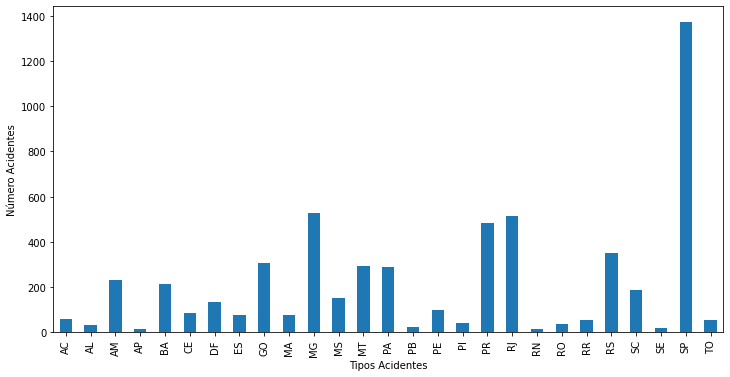

In [ ]:
df.groupby(['ocorrencia_uf']).size().plot.bar(figsize = (12, 6), xlabel = 'Tipos Acidentes', ylabel = 'Número Acidentes')

In [ ]:
df.to_csv('baseparadata.csv', index=False)